# Requirements

In [1]:
!pip install -r requirements.txt

# Download trends from Google trends


In [2]:
!python google_trends.py --keyword "['Praktikum']" --cat '958' --models "[ExponentialSmoothing()]"

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
Google is rejecting us...
Retrying in 2 seconds...
Google is rejecting us...
Retrying in 4 seconds...
Google is rejecting us...
Retrying in 6 seconds...
Google is rejecting us...
Retrying in 8 seconds...
Google keeps rejecting us


#Manual Download
In case Google keeps rejecting the us (probably due to overuse of the unoffical API), you can also manually download the data and then use the `main` function to train and compare different models.

## Import `main` function
Make sure that google_trends.py is in the directory.

In [3]:
from google_trends import main
import pandas as pd
import datetime
from darts.models import ExponentialSmoothing, TBATS

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Load the data
Download the data from Google Trends and load them as a dataframe. Make sure that the column matches your keyword.

In [4]:
data = pd.read_csv('praktikum_daten.csv').iloc[1:] #remove first row
data.index.name = "date"
data.columns = ['Praktikum']
data = data.astype('float')

## Run the main function
Set your prefered split_date to determine training and test sets, and specify which models you want to compare.

Preparing data...


historical forecasts: 100%|██████████| 52/52 [2:09:21<00:00, 149.26s/it]

found best model


successfully trained model


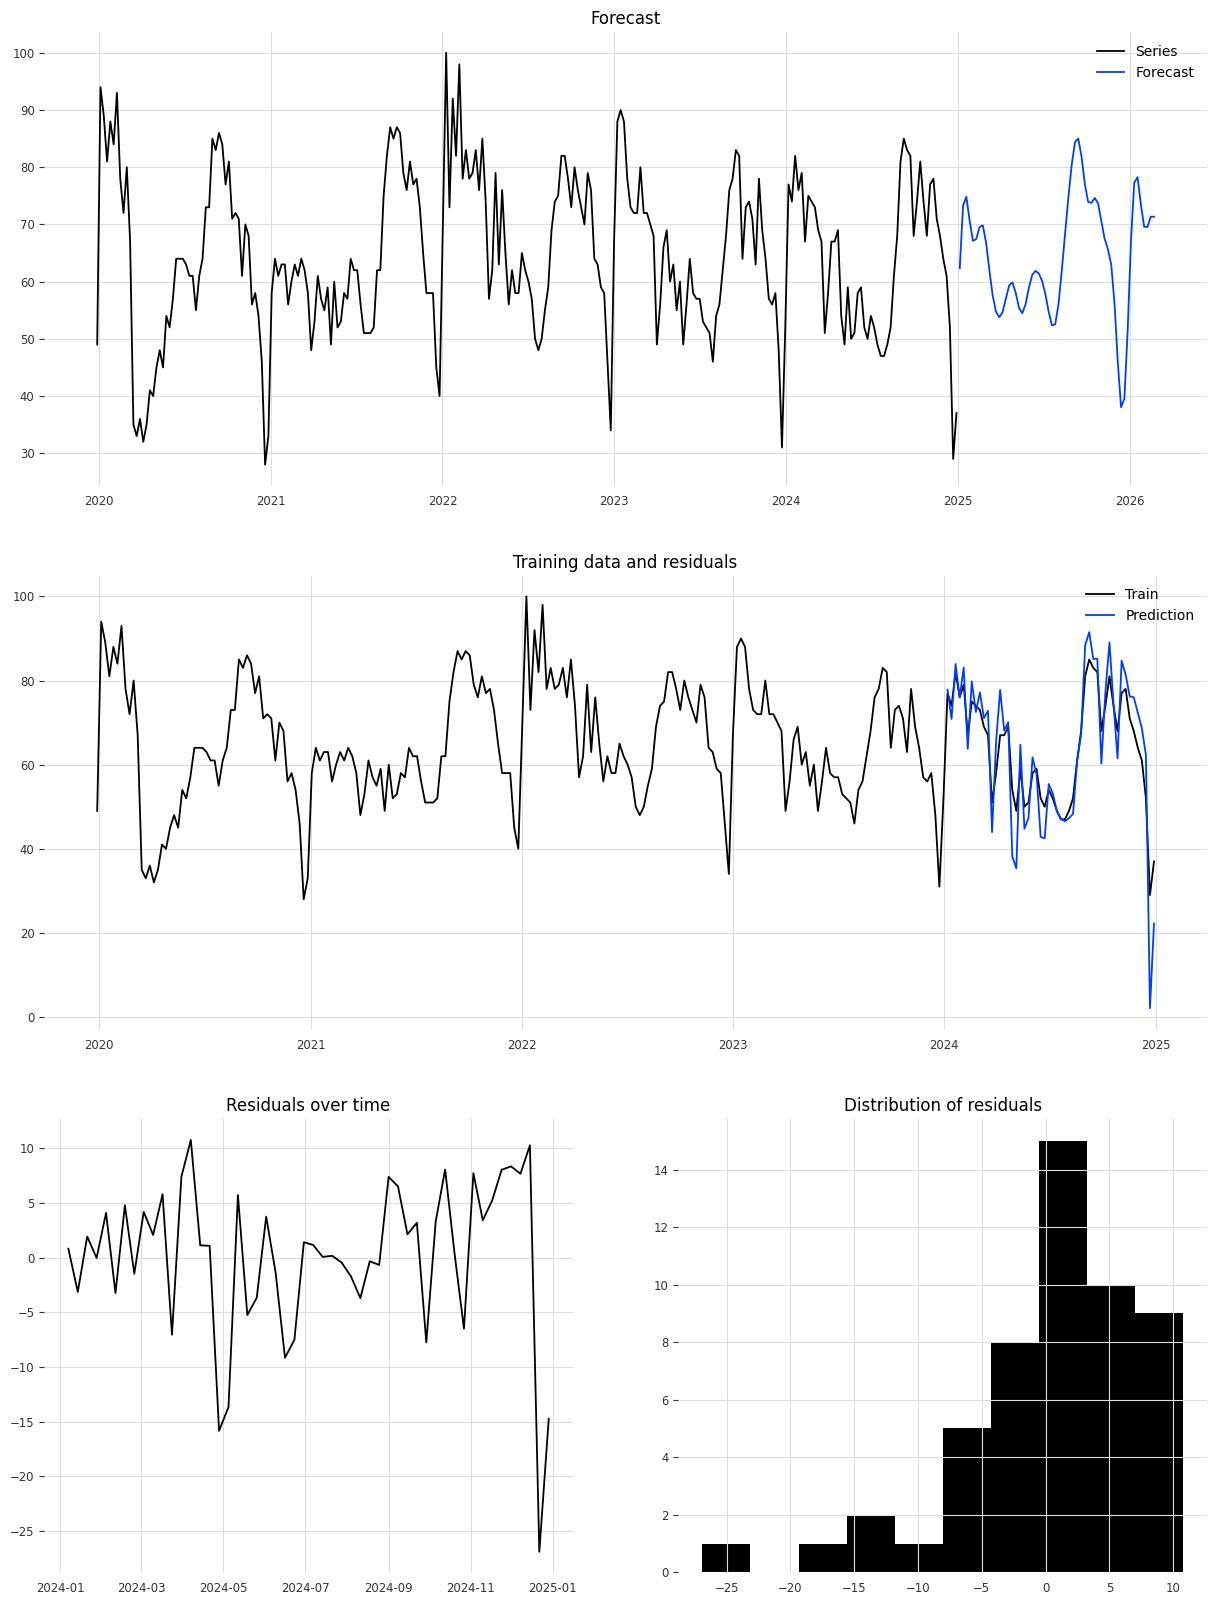

In [5]:
date = datetime.datetime.now() - datetime.timedelta(days=365)
split_date = date.strftime('%Y-%m-%d')
keyword = ['Praktikum']
models = [ExponentialSmoothing(), TBATS()]


main(keyword = keyword, cat = '958', models = models, split_date= split_date, data = data)